In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns
import 
%matplotlib inline

Load the Facebook data and show the header

In [90]:
# We need to convert date column to timestamp in timeserie analysis 
facebook_df = pd.read_csv('FB_data.csv',parse_dates=['Date'])

facebook_df.head()
type(facebook_df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [91]:
#By plotting the difference between the Adjusted volume and the Volume, we see that the Adj columns are redundant.
# So deleting the Adj columns from the facebook dataframe

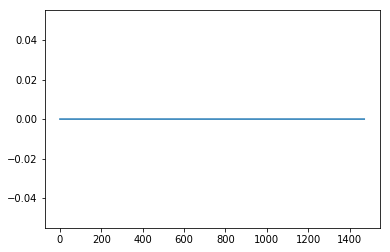

In [92]:
# quick way to check that before deleting 
(facebook_df['Volume'] - facebook_df['Adj. Volume']).plot();

In [93]:
# Here we check if there are multiple values for Split Ratio" None so we can remove the column as well
facebook_df['Split Ratio'].unique()

array([1.])

In [96]:

# do this once 
list_to_drop = ["Split Ratio","Adj. Open","Adj. High","Adj. Low","Adj. Close","Adj. Volume"]
facebook_df.drop(list_to_drop,axis=1,inplace=True)

In [100]:
facebook_df.head()
# this too once only 
facebook_df.set_index('Date',inplace=True)
facebook_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1472 entries, 2018-03-27 to 2012-05-18
Data columns (total 6 columns):
Open           1472 non-null float64
High           1472 non-null float64
Low            1472 non-null float64
Close          1472 non-null float64
Volume         1472 non-null float64
Ex-Dividend    1472 non-null float64
dtypes: float64(6)
memory usage: 80.5 KB


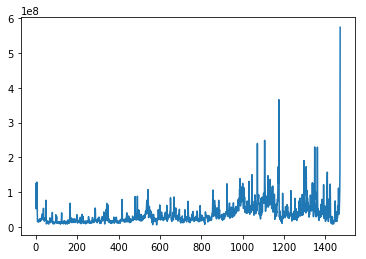

In [98]:
facebook_df['Volume'].plot();

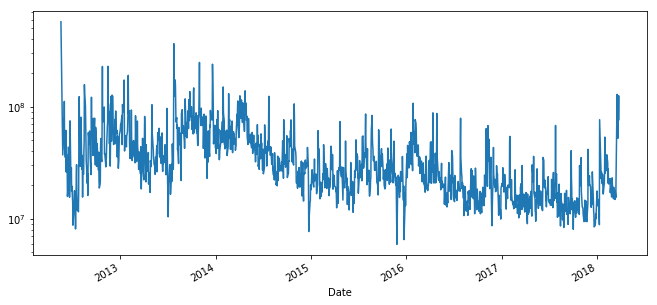

In [104]:
# Ideal to use logy plot in time series data 
facebook_df['Volume'].plot(logy=True,figsize=(11,5));

In [33]:
window1_df = facebook_df.iloc[0:4,:]
window1_df['Ex-Dividend'].nunique()
# Based on 2 I m removing column Ex-Dividend
#window1_df.drop('Ex-Dividend',axis=1,inplace=True)
#window1_df

1

In [34]:
# from sklearn.model_selection import train_test_split
# X = window1_df.iloc[:,4].values
# y = window1_df.iloc[0:1,4].values
# # Train test split
# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=.2, random_state=0)

In [35]:
#window1_df.iloc[-1:,:].values


In [36]:
#window1_df.iloc[:,4].values

In [37]:
#window1_df.iloc[0:1,4].values

In [38]:
#window1_df

In [105]:
#my_train_df = facebook_df[facebook_df['Date'] >"2018-03-23"]

In [106]:
len(facebook_df)

1472

In [118]:
train_df = facebook_df.iloc[:1177]

In [119]:
train_df.head()

,Open,High,Low,Close,Volume,Ex-Dividend
Date,,,,,,
2018-03-27,156.31,162.85,150.75,152.19,76787884.0,0.0
2018-03-26,160.82,161.10,149.02,160.06,125438294.0,0.0
2018-03-23,165.44,167.10,159.02,159.39,52306891.0,0.0
2018-03-22,166.13,170.27,163.72,164.89,73389988.0,0.0
2018-03-21,164.80,173.40,163.30,169.39,105350867.0,0.0


In [66]:
test_df = facebook_df.iloc[1177:]

In [67]:
len(test_df)

295

In [110]:
# I have my test and my train data . Now I m going to pull my features and output

In [68]:
X_train = train_df['Volume']

In [71]:
X_test = test_df['Volume']

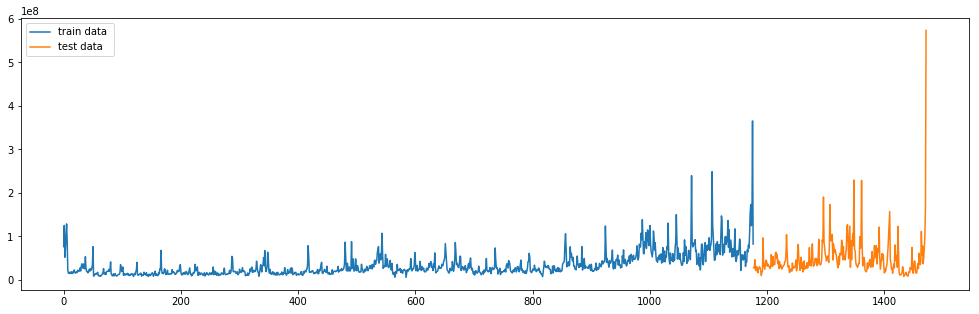

In [113]:
ax = X_train.plot(figsize=(17,5))
X_test.plot(ax=ax)
plt.legend(['train data ', 'test data']);

In [114]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(X_train.values.reshape(-1,1))
test_sc = sc.transform(X_test.values.reshape(-1,1))

In [160]:
X_train_fb = train_sc[:-1]
y_train_fb = train_sc[1:]

X_test_fb = test_sc[:-1]
y_test_fb = test_sc[1:]

In [116]:
X_train_fb.shape, y_train_fb.shape, X_test_fb.shape, y_test_fb.shape

((1176, 1), (1176, 1), (294, 1), (294, 1))

In [120]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping

ModuleNotFoundError: No module named 'keras'

In [121]:
!pip install keras

    100% |████████████████████████████████| 307kB 5.6MB/s ta 0:00:01
    100% |████████████████████████████████| 51kB 19.5MB/s ta 0:00:01
    100% |████████████████████████████████| 6.1MB 5.3MB/s eta 0:00:01


In [127]:
!pip install tensorflow
# from keras.models import Sequential
# from keras.layers import Dense
# import keras.backend as K
# from keras.callbacks import EarlyStopping

    100% |████████████████████████████████| 56.1MB 765kB/s ta 0:00:011
    100% |████████████████████████████████| 2.0MB 8.0MB/s ta 0:00:011
    100% |████████████████████████████████| 3.3MB 5.6MB/s eta 0:00:01
    100% |████████████████████████████████| 92kB 8.9MB/s ta 0:00:011
    100% |████████████████████████████████| 573kB 11.2MB/s ta 0:00:01
    100% |████████████████████████████████| 81kB 12.6MB/s ta 0:00:01
  Running setup.py bdist_wheel for termcolor ... done
  Stored in directory: /Users/bunni/Library/Caches/pip/wheels/7c/06/54/bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
  Running setup.py bdist_wheel for absl-py ... done
  Stored in directory: /Users/bunni/Library/Caches/pip/wheels/3c/33/ae/db8cd618e62f87594c13a5483f96e618044f9b01596efd013f
  Running setup.py bdist_wheel for gast ... done
  Stored in directory: /Users/bunni/Library/Caches/pip/wheels/9a/1f/0e/3cde98113222b853e98fc0a8e9924480a3e25f1b4008cedb4f
Successfully built termcolor absl-py gast
  Found existing i

In [128]:
import tensorflow

/Users/bunni/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [129]:
import keras

Using TensorFlow backend.


In [130]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping

In [131]:
K.clear_session()

model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                24        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [132]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

In [134]:
model.fit(X_train_fb, y_train_fb, epochs=200,
          batch_size=500, verbose=1,
          callbacks=[early_stop])

Epoch 1/200
1176/1176 [==============================] - 0s 137us/step - loss: 0.0079
Epoch 2/200
1176/1176 [==============================] - 0s 4us/step - loss: 0.0067
Epoch 3/200
1176/1176 [==============================] - 0s 4us/step - loss: 0.0058
Epoch 4/200
1176/1176 [==============================] - 0s 3us/step - loss: 0.0051
Epoch 5/200
1176/1176 [==============================] - 0s 4us/step - loss: 0.0045
Epoch 6/200
1176/1176 [==============================] - 0s 4us/step - loss: 0.0042
Epoch 7/200
1176/1176 [==============================] - 0s 6us/step - loss: 0.0039
Epoch 8/200
1176/1176 [==============================] - 0s 5us/step - loss: 0.0038
Epoch 9/200
1176/1176 [==============================] - 0s 4us/step - loss: 0.0038
Epoch 10/200
1176/1176 [==============================] - 0s 4us/step - loss: 0.0038
Epoch 11/200
1176/1176 [==============================] - 0s 4us/step - loss: 0.0037
Epoch 12/200
1176/1176 [==============================] - 0s 6us/step - 

In [141]:
y_pred = model.predict(X_test_fb)
len(y_pred)

294

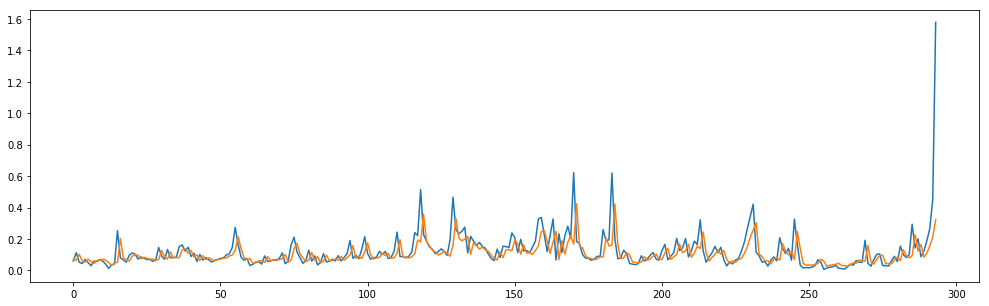

In [154]:
len(y_test_fb)
plt.figure(figsize=(17,5))
plt.plot(y_test_fb)
plt.plot(y_pred)


In [155]:
from sklearn.metrics import mean_squared_error

In [156]:
mean_squared_error(y_test_fb, y_pred)

0.011674000438959262

In [157]:
train_sc.shape

(1177, 1)

In [161]:
train_sc_df = pd.DataFrame(train_sc, columns=['Scaled'], index=X_train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Scaled'], index=X_test.index)
train_sc_df.head()

,Scaled
0,0.197124
1,0.332435
2,0.129035
3,0.187673
4,0.276566


In [162]:
window_size = 1

In [166]:
for s in range(1, window_size + 1):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['Scaled'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['Scaled'].shift(s)

In [168]:
train_sc_df.head(window_size)

,Scaled,shift_1
0,0.197124,NaN


In [169]:
X_train = train_sc_df.dropna().drop('Scaled', axis=1).values
y_train = train_sc_df.dropna()[['Scaled']].values

X_test = test_sc_df.dropna().drop('Scaled', axis=1).values
y_test = test_sc_df.dropna()[['Scaled']].values

In [170]:
X_train.shape

(1176, 1)

In [171]:
K.clear_session()

model = Sequential()
model.add(Dense(12, input_dim=window_size, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                24        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [172]:
model.fit(X_train, y_train, epochs=200,
          batch_size=500, verbose=1, callbacks=[early_stop])

Epoch 1/200
1176/1176 [==============================] - 0s 119us/step - loss: 0.0108
Epoch 2/200
1176/1176 [==============================] - 0s 4us/step - loss: 0.0095
Epoch 3/200
1176/1176 [==============================] - 0s 4us/step - loss: 0.0083
Epoch 4/200
1176/1176 [==============================] - 0s 4us/step - loss: 0.0073
Epoch 5/200
1176/1176 [==============================] - 0s 4us/step - loss: 0.0065
Epoch 6/200
1176/1176 [==============================] - 0s 3us/step - loss: 0.0058
Epoch 7/200
1176/1176 [==============================] - 0s 3us/step - loss: 0.0053
Epoch 8/200
1176/1176 [==============================] - 0s 3us/step - loss: 0.0050
Epoch 9/200
1176/1176 [==============================] - 0s 4us/step - loss: 0.0047
Epoch 10/200
1176/1176 [==============================] - 0s 5us/step - loss: 0.0045
Epoch 11/200
1176/1176 [==============================] - 0s 5us/step - loss: 0.0044
Epoch 12/200
1176/1176 [==============================] - 0s 5us/step - 

1176/1176 [==============================] - 0s 4us/step - loss: 0.0027
Epoch 98/200
1176/1176 [==============================] - 0s 5us/step - loss: 0.0027
Epoch 99/200
1176/1176 [==============================] - 0s 3us/step - loss: 0.0027
Epoch 100/200
1176/1176 [==============================] - 0s 4us/step - loss: 0.0027
Epoch 101/200
1176/1176 [==============================] - 0s 4us/step - loss: 0.0027
Epoch 102/200
1176/1176 [==============================] - 0s 4us/step - loss: 0.0027
Epoch 103/200
1176/1176 [==============================] - 0s 3us/step - loss: 0.0027
Epoch 104/200
1176/1176 [==============================] - 0s 3us/step - loss: 0.0027
Epoch 105/200
1176/1176 [==============================] - 0s 4us/step - loss: 0.0027
Epoch 106/200
1176/1176 [==============================] - 0s 5us/step - loss: 0.0027
Epoch 107/200
1176/1176 [==============================] - 0s 5us/step - loss: 0.0027
Epoch 108/200
1176/1176 [==============================] - 0s 5us/step

In [173]:
y_pred_fc_window = model.predict(X_test_fb)

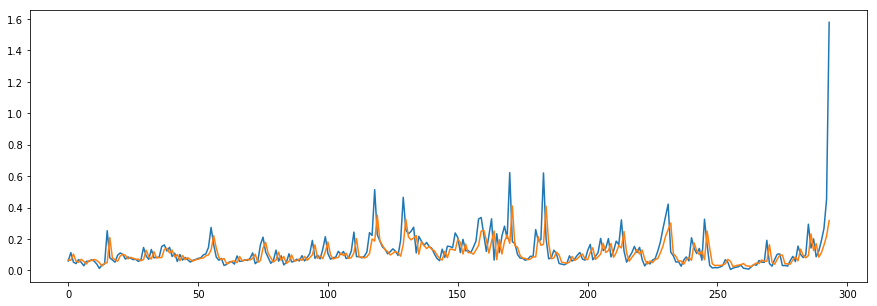

In [176]:
plt.figure(figsize=(15,5))
plt.plot(y_test_fb)
plt.plot(y_pred_fc_window)


In [177]:
# LSTM 
from keras.layers import LSTM,CuDNNLSTM

In [178]:
X_train_t = X_train_fb.reshape(X_train_fb.shape[0], window_size, 1)
X_test_t = X_test_fb.reshape(X_test_fb.shape[0], window_size, 1)

In [183]:
X_train_t.shape

(1176, 1, 1)

In [187]:
K.clear_session()

model = Sequential()
model.add(Dense(12, input_dim=window_size, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                24        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [186]:
model.fit(X_train_t, y_train_fb, epochs=100,
          batch_size=500, verbose=1, callbacks=[early_stop])

ValueError: Error when checking input: expected dense_1_input to have 2 dimensions, but got array with shape (1176, 1, 1)

In [182]:
#y_pred_fc_window = model.predict(X_test_fb)